# **Teknik Binning**

Data binning atau bucketing adalah metode pra-pemrosesan data yang digunakan untuk mengurangi dampak kesalahan pengamatan. Nilai data asli dibagi ke dalam interval-interval kecil yang disebut bin, lalu nilai-nilai tersebut digantikan oleh suatu nilai umum yang dihitung untuk setiap bin tersebut. Metode ini memiliki efek menghaluskan (smoothing) pada data masukan dan juga dapat mengurangi risiko overfitting terutama pada kasus dataset yang kecil.
Ada beberapa **metode di data mining (data mining methods)** yang **memerlukan diskritisasi (discretization)** sebelumnya diantaranya adalah

# **Implementasi Dataset Iris**

## Import Library

In [143]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load Data

Saya menggunakan data iris asli tanpa outlier yang berasal dari library sklearn

In [144]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
y_labels = pd.Series(y).map(lambda i: iris.target_names[i])

df_iris = X.copy()
df_iris.columns = ['sepal_length (cm)', 'sepal_width (cm)', 'petal_length (cm)', 'petal_width (cm)']
df_iris['class'] = y_labels

from IPython.display import display, HTML
display(HTML(df_iris.head().to_html(index=False)))


sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm),class
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


## Klasifikasi Naive Bayes

Pada tahap ini, dilakukan klasifikasi terhadap dataset Iris menggunakan algoritma Naive Bayes. Dataset Iris terdiri dari empat fitur numerik (panjang dan lebar sepal serta petal) dan tiga kelas target: setosa, versicolor, dan virginica. Data dibagi menjadi dua bagian, yaitu data latih (70%) dan data uji (30%). Model Naive Bayes dilatih menggunakan data latih dan kemudian digunakan untuk memprediksi kelas data uji.

Akurasi Naive Bayes: 0.9778

Naive Bayes Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



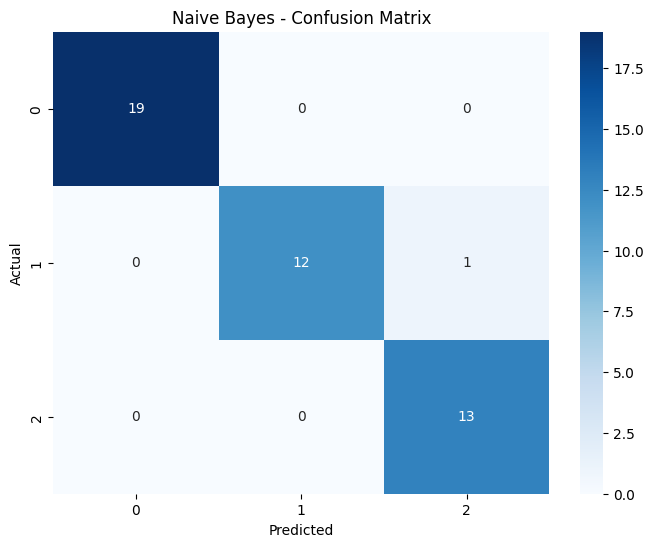

In [145]:
# Bagi data menjadi train dan test
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan latih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

# Prediksi dan akurasi
y_pred_nb = nb_model.predict(X_test_nb)
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)

# Tampilkan hasil akurasi
print(f"Akurasi Naive Bayes: {accuracy_nb:.4f}\n")

# Classification report
report_nb = classification_report(y_test_nb, y_pred_nb, target_names=iris.target_names)
print("Naive Bayes Classification Report:\n", report_nb)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(y_test_nb, y_pred_nb, rownames=['Actual'], colnames=['Predicted']),
    annot=True, fmt='d', cmap='Blues'
)
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

Hasil evaluasi menunjukkan bahwa model ini mampu mengklasifikasikan data dengan **akurasi sebesar 97,78%**, yang mengindikasikan performa yang sangat baik dalam mengenali pola-pola dalam data Iris.

## Klasifikasi Decision Tree

Selain itu, dilakukan pula klasifikasi menggunakan algoritma Decision Tree pada dataset Iris yang sama. Seperti pada metode sebelumnya, data dibagi menjadi data latih dan data uji dengan proporsi 70:30. Model Decision Tree dibangun berdasarkan pemisahan fitur yang paling informatif untuk membedakan kelas-kelas bunga.

Akurasi Naive Bayes: 1.0000


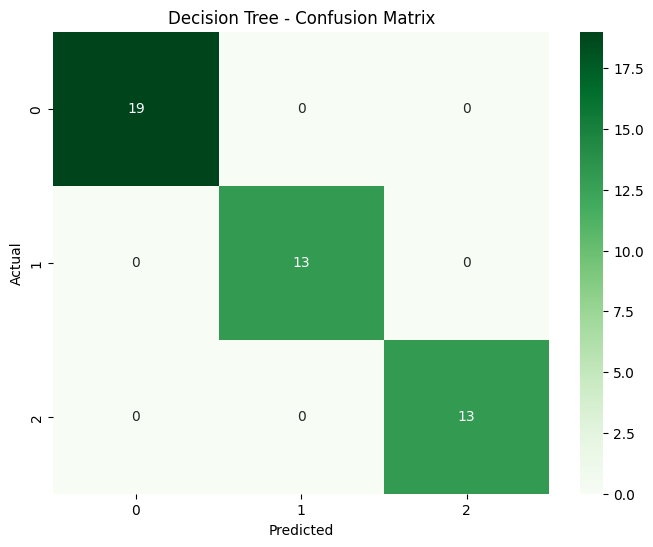

In [146]:
# Bagi data menjadi train dan test (gunakan split yang berbeda agar adil)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Prediksi dan hitung akurasi
y_pred_dt = dt_model.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)

# Tampilkan hasil akurasi
print(f"Akurasi Naive Bayes: {accuracy_dt:.4f}")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.crosstab(y_test_dt, y_pred_dt, rownames=['Actual'], colnames=['Predicted']),
    annot=True, fmt='d', cmap='Greens'
)
plt.title('Decision Tree - Confusion Matrix')
plt.show()


Berdasarkan hasil prediksi dan evaluasi terhadap data uji, diperoleh akurasi sebesar 100%, yang menunjukkan bahwa model mampu mengklasifikasikan semua sampel uji dengan benar. Hal ini menunjukkan bahwa Decision Tree sangat efektif untuk dataset ini, kemungkinan karena struktur pohon mampu menangkap batas-batas antar kelas dengan sangat baik.

Decision Tree Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



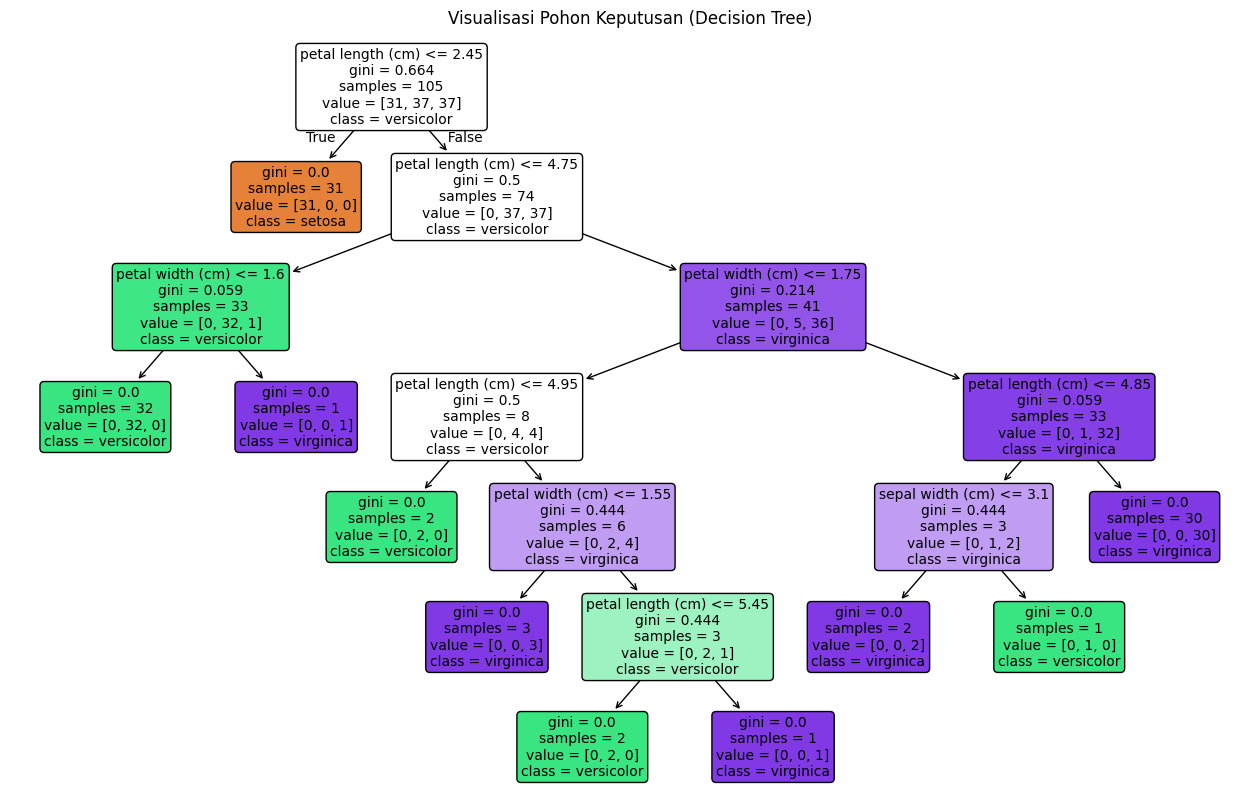

In [147]:
# Bagi data menjadi train dan test
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Prediksi dan akurasi
y_pred_dt = dt_model.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)

# Classification report
report_dt = classification_report(y_test_dt, y_pred_dt, target_names=iris.target_names)
print("Decision Tree Classification Report:\n", report_dt)

# Visualisasi Pohon Keputusan
plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()

Berdasarkan hasil prediksi dan evaluasi terhadap data uji, diperoleh **akurasi sebesar 100%**, yang menunjukkan bahwa model mampu mengklasifikasikan semua sampel uji dengan benar. Hal ini menunjukkan bahwa Decision Tree sangat efektif untuk dataset ini, kemungkinan karena struktur pohon mampu menangkap batas-batas antar kelas dengan sangat baik.

## Diskritisasi

Sebelum melanjutkan ke proses klasifikasi berikutnya, dilakukan tahap diskritisasi terhadap fitur numerik pada dataset Iris. Diskritisasi merupakan proses mengubah nilai numerik kontinu menjadi nilai kategori diskret atau interval tertentu. Tujuan utama dari proses ini adalah untuk:

*   Menyederhanakan data agar lebih mudah diolah oleh algoritma tertentu, khususnya yang berbasis probabilistik seperti Naive Bayes.
*   Mengurangi noise dan variabilitas kecil dalam data numerik.
*   Menguji apakah konversi fitur kontinu menjadi diskret berdampak terhadap performa model klasifikasi

Pada tahap ini, akan digunakan tiga teknik diskritisasi:

1.   Means Discretization - Membagi data ke dalam cluster berdasarkan kemiripan (unsupervised)
2.   Equal-Width Binning - Membagi rentang nilai ke dalam interval dengan lebar yang sama
3.   Equal-Frequency Binning - Membagi nilai data ke dalam kelompok dengan jumlah data yang sama

Setelah proses diskritisasi dilakukan, dataset yang telah dikonversi akan digunakan kembali untuk klasifikasi menggunakan algoritma **Naive Bayes dan Decision Tree**. Hasil akurasi dari model akan dibandingkan untuk melihat sejauh mana pengaruh metode diskritisasi terhadap performa klasifikasi.




### Diskritisasi Menggunakan K-Means Clustering

Diskritisasi dengan metode **K-Means** dilakukan dengan memanfaatkan algoritma unsupervised learning untuk mengelompokkan nilai-nilai numerik ke dalam beberapa **cluster (kelompok)**. Berbeda dengan metode binning yang menggunakan pembagian rentang atau jumlah data, K-Means mendasarkan pengelompokan pada kemiripan data (proximity).

Dalam tahap ini, setiap fitur numerik pada dataset Iris akan diproses secara independen menggunakan K-Means dengan jumlah cluster tertentu (misalnya 3 cluster). Hasil clustering kemudian akan menggantikan nilai numerik asli dengan label cluster yang bersesuaian. Proses ini mengubah fitur numerik menjadi kategori diskrit, sehingga dapat mengubah dinamika perilaku model klasifikasi.

Setelah diskritisasi dilakukan, dataset hasil transformasi akan digunakan untuk pelatihan dan evaluasi model klasifikasi **Naive Bayes dan Decision Tree**, sehingga bisa dibandingkan dengan hasil dari data asli dan metode diskritisasi lainnya.

In [148]:
def discretize_kmeans_categorical(X, y_labels, n_bins=4):
    X_discretized = X.copy()
    mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
    for col in X.columns:
        kmeans = KMeans(n_clusters=n_bins, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X[[col]])
        X_discretized[col] = pd.Series(labels).map(mapping)

    df_result = X_discretized.copy()
    df_result['class'] = y_labels # Gunakan y_labels sesuai definisi fungsi
    return df_result[['class'] + list(X.columns)]

# Panggil fungsi dengan menggunakan variabel y_labels yang sudah didefinisikan
df_kmeans_categorized = discretize_kmeans_categorical(X, y_labels)

display(HTML(df_kmeans_categorized.head().to_html(index=False)))

class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,C,B,B,A
setosa,C,A,B,A
setosa,C,B,B,A
setosa,C,A,B,A
setosa,C,B,B,A


#### Klasifikasi Naive Bayes Menggunakan Data Iris Hasil dari Diskritisasi Menggunakan K-Means

In [149]:
# Encoding fitur kategorikal ke angka
X_encoded = df_kmeans_categorized.drop(columns='class')
y_encoded = df_kmeans_categorized['class']
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X_encoded)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb_kmeans = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes (KMeans): {accuracy_nb:.4f}")
print("Classification Report Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Akurasi Naive Bayes (KMeans): 0.9778
Classification Report Naive Bayes:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### Klasifikasi Decision Tree Menggunakan Data Iris Hasil dari Diskritisasi Menggunakan K-Means

In [150]:
# Encoding fitur kategorikal ke angka
X_encoded = df_kmeans_categorized.drop(columns='class')
y_encoded = df_kmeans_categorized['class']
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X_encoded)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Klasifikasi dengan Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt_kmeans = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree (KMeans): {accuracy_dt:.4f}")
print("Classification Report Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Akurasi Decision Tree (KMeans): 1.0000
Classification Report Decision Tree:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### Diskritisasi Menggunakan Equal-Width Binning



Equal-Width Binning adalah salah satu teknik diskritisasi yang membagi nilai-nilai numerik menjadi beberapa **interval dengan lebar** yang sama. Proses ini dilakukan dengan cara menghitung selisih antara nilai maksimum dan minimum dari suatu fitur, kemudian membaginya menjadi sejumlah bin (kelompok) yang ditentukan sebelumnya.

Pada tahap ini, setiap fitur pada dataset Iris akan dibagi ke dalam empat bin (interval) dengan lebar yang sama. Setiap nilai dalam fitur tersebut akan dikategorikan ke dalam salah satu bin berdasarkan rentang interval yang ditetapkan.

Selanjutnya, hasil binning akan dikonversi menjadi label kategorikal, seperti A, B, C, D, untuk merepresentasikan masing-masing kelompok. Dataset hasil transformasi kemudian digunakan untuk pelatihan dan evaluasi model klasifikasi menggunakan Naive Bayes dan Decision Tree, sehingga dapat dibandingkan performanya dengan hasil diskritisasi K-Means maupun data asli.

In [151]:
def discretize_equal_width_categorical(X, y_labels, n_bins=4):
    # Diskritisasi menggunakan Equal-Width Binning
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    X_binned = discretizer.fit_transform(X)

    # Mapping ke huruf A-D
    bin_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
    X_categorized = pd.DataFrame(X_binned, columns=X.columns).astype(int).applymap(lambda val: bin_mapping[val])

    # Gabungkan dengan label class
    df_result = X_categorized.copy()
    df_result['class'] = y_labels
    return df_result[['class'] + list(X.columns)]

# Diskritisasi data
df_eq_width_categorized = discretize_equal_width_categorical(X, y_labels)

display(HTML(df_eq_width_categorized.head().to_html(index=False)))

/tmp/ipython-input-151-4282749667.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_categorized = pd.DataFrame(X_binned, columns=X.columns).astype(int).applymap(lambda val: bin_mapping[val])


class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,A,C,A,A
setosa,A,B,A,A
setosa,A,C,A,A
setosa,A,B,A,A
setosa,A,C,A,A


#### Klasifikasi Decision Tree Menggunakan Data Iris Hasil dari Diskritisasi Menggunakan Equal-Width Binning

In [152]:
# Encoding fitur untuk klasifikasi
X_eqw = df_eq_width_categorized.drop(columns='class')
y_eqw = df_eq_width_categorized['class']
encoder_eqw = OrdinalEncoder()
X_eqw_encoded = encoder_eqw.fit_transform(X_eqw)

# Split Data
X_train_eqw, X_test_eqw, y_train_eqw, y_test_eqw = train_test_split(X_eqw_encoded, y_eqw, test_size=0.3, random_state=42)

# Klasifikasi dengan Naive Bayes
nb_eqw = CategoricalNB()
nb_eqw.fit(X_train_eqw, y_train_eqw)
y_pred_nb_eqw = nb_eqw.predict(X_test_eqw)
accuracy_nb_eqw = accuracy_score(y_test_eqw, y_pred_nb_eqw)
print(f"Akurasi Naive Bayes (Equal-Width): {accuracy_nb_eqw:.4f}")
print("Classification Report Naive Bayes (Equal-Width):")
print(classification_report(y_test_eqw, y_pred_nb_eqw))

Akurasi Naive Bayes (Equal-Width): 0.9333
Classification Report Naive Bayes (Equal-Width):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.85      0.88        13
   virginica       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



#### Klasifikasi Decision Tree Menggunakan Data Iris Hasil dari Diskritisasi Menggunakan Equal-Width Binning

In [153]:
# Encoding fitur untuk klasifikasi
X_eqw = df_eq_width_categorized.drop(columns='class')
y_eqw = df_eq_width_categorized['class']
encoder_eqw = OrdinalEncoder()
X_eqw_encoded = encoder_eqw.fit_transform(X_eqw)

# Split Data
X_train_eqw, X_test_eqw, y_train_eqw, y_test_eqw = train_test_split(X_eqw_encoded, y_eqw, test_size=0.3, random_state=42)

# Klasifikasi dengan Decision Tree
dt_eqw = DecisionTreeClassifier(random_state=42)
dt_eqw.fit(X_train_eqw, y_train_eqw)
y_pred_dt_eqw = dt_eqw.predict(X_test_eqw)
accuracy_dt_eqw = accuracy_score(y_test_eqw, y_pred_dt_eqw)
print(f"Akurasi Decision Tree (Equal-Width): {accuracy_dt_eqw:.4f}")
print("Classification Report Decision Tree (Equal-Width):")
print(classification_report(y_test_eqw, y_pred_dt_eqw))

Akurasi Decision Tree (Equal-Width): 0.9778
Classification Report Decision Tree (Equal-Width):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### Diskritisasi Menggunakan Equal-Frequency Binning

**Equal-Frequency Binning**, atau dikenal juga sebagai **quantile binning**, adalah teknik diskritisasi yang membagi data numerik menjadi beberapa kelompok (bin) sehingga **jumlah data dalam tiap bin adalah sama atau hampir sama**. Ini berbeda dengan Equal-Width Binning yang membagi berdasarkan interval lebar, karena Equal-Frequency lebih fokus pada distribusi jumlah data dalam tiap kelompok.

Dalam proses ini, setiap fitur numerik pada dataset Iris akan dibagi ke dalam empat bin (kelompok), dengan jumlah data yang kurang lebih seimbang pada masing-masing bin. Setiap nilai kemudian dikategorikan ke dalam bin berdasarkan urutan nilainya dalam distribusi data.

Setelah dilakukan binning, label numerik dari bin akan diubah menjadi label kategorikal seperti A, B, C, D. Dataset yang telah didiskritisasi secara equal-frequency ini selanjutnya akan digunakan untuk melakukan klasifikasi menggunakan Naive Bayes dan Decision Tree, untuk mengevaluasi bagaimana teknik ini memengaruhi performa model dibandingkan dengan metode diskritisasi lainnya.

In [154]:
def discretize_equal_freq_categorical(X, y_labels, n_bins=4):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    X_binned = discretizer.fit_transform(X)

    bin_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
    X_categorized = pd.DataFrame(X_binned, columns=X.columns).astype(int).applymap(lambda val: bin_mapping[val])

    df_result = X_categorized.copy()
    df_result['class'] = y_labels
    return df_result[['class'] + list(X.columns)]

# Terapkan Diskritisasi
df_eq_freq_categorized = discretize_equal_freq_categorical(X, y_labels)


display(HTML(df_eq_freq_categorized.head().to_html(index=False)))

/tmp/ipython-input-154-2441665434.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_categorized = pd.DataFrame(X_binned, columns=X.columns).astype(int).applymap(lambda val: bin_mapping[val])


class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,B,D,A,A
setosa,A,C,A,A
setosa,A,C,A,A
setosa,A,C,A,A
setosa,A,D,A,A


#### Klasifikasi Decision Tree Menggunakan Data Iris Hasil dari Diskritisasi Menggunakan Equal-Frequency Binning

In [155]:
# Encoding Fitur untuk Klasifikasi
X_eqf = df_eq_freq_categorized.drop(columns='class')
y_eqf = df_eq_freq_categorized['class']
encoder_eqf = OrdinalEncoder()
X_eqf_encoded = encoder_eqf.fit_transform(X_eqf)

# Split Data
X_train_eqf, X_test_eqf, y_train_eqf, y_test_eqf = train_test_split(X_eqf_encoded, y_eqf, test_size=0.3, random_state=42)

# Klasifikasi dengan Naive Bayes
nb_eqf = CategoricalNB()
nb_eqf.fit(X_train_eqf, y_train_eqf)
y_pred_nb_eqf = nb_eqf.predict(X_test_eqf)
accuracy_nb_eqf = accuracy_score(y_test_eqf, y_pred_nb_eqf)
print(f"Akurasi Naive Bayes (Equal-Frequency): {accuracy_nb_eqf:.4f}")
print("Classification Report Naive Bayes (Equal-Frequency):")
print(classification_report(y_test_eqf, y_pred_nb_eqf))

Akurasi Naive Bayes (Equal-Frequency): 0.9556
Classification Report Naive Bayes (Equal-Frequency):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### Klasifikasi Decision Tree Menggunakan Data Iris Hasil dari Diskritisasi Menggunakan Equal-Frequency Binning

In [156]:
# Encoding Fitur untuk Klasifikasi
X_eqf = df_eq_freq_categorized.drop(columns='class')
y_eqf = df_eq_freq_categorized['class']
encoder_eqf = OrdinalEncoder()
X_eqf_encoded = encoder_eqf.fit_transform(X_eqf)

# Split Data
X_train_eqf, X_test_eqf, y_train_eqf, y_test_eqf = train_test_split(X_eqf_encoded, y_eqf, test_size=0.3, random_state=42)

# Klasifikasi dengan Decision Tree
dt_eqf = DecisionTreeClassifier(random_state=42)
dt_eqf.fit(X_train_eqf, y_train_eqf)
y_pred_dt_eqf = dt_eqf.predict(X_test_eqf)
accuracy_dt_eqf = accuracy_score(y_test_eqf, y_pred_dt_eqf)
print(f"Akurasi Decision Tree (Equal-Frequency): {accuracy_dt_eqf:.4f}")
print("Classification Report Decision Tree (Equal-Frequency):")
print(classification_report(y_test_eqf, y_pred_dt_eqf))

Akurasi Decision Tree (Equal-Frequency): 0.9333
Classification Report Decision Tree (Equal-Frequency):
              precision    recall  f1-score   support

      setosa       0.90      1.00      0.95        19
  versicolor       0.92      0.85      0.88        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45



In [158]:
# Buat tabel ringkasan akurasi
comparison_df = pd.DataFrame({
    'Metode': [
        'Data Asli',
        'K-Means Discretization',
        'Equal-Width Binning',
        'Equal-Frequency Binning'
    ],
    'Naive Bayes Accuracy': [
        accuracy_nb,         # dari data asli
        accuracy_nb_kmeans,  # dari k-means
        accuracy_nb_eqw,     # dari equal-width
        accuracy_nb_eqf      # dari equal-frequency
    ],
    'Decision Tree Accuracy': [
        accuracy_dt,         # dari data asli
        accuracy_dt_kmeans,  # dari k-means
        accuracy_dt_eqw,     # dari equal-width
        accuracy_dt_eqf      # dari equal-frequency
    ]
})

# Tampilkan tabel
display(comparison_df)

,Metode,Naive Bayes Accuracy,Decision Tree Accuracy
0,Data Asli,0.977778,1.000000
1,K-Means Discretization,0.955556,0.977778
2,Equal-Width Binning,0.933333,0.977778
3,Equal-Frequency Binning,0.955556,0.933333
